In [139]:

import numpy as np 
import pandas as pd  


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [140]:
#library untuk data analysis tools.
import pandas as pd
import numpy as np

#library untuk visualisasi data.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [141]:
#proses pembacaan data atau import data

df = pd.read_excel('Dataset.xlsx')

In [142]:
#Melihat 5 baris teratas dari data.
#Independent variabel(x) adalah Tanggal, Kegiatan, Curah hujan, Penjualan.
#Dependent variabel(y) adalah Penjualan.
df.head()

,Hari,Tanggal,Kegiatan,Curah Hujan (mm),Penjualan (pcs)
0,2,1,0,1.4,0
1,3,2,1,1.2,27
2,4,3,1,15.2,458
3,5,4,1,13.4,20
4,6,5,1,7.7,7


In [143]:
#Melihat 5 baris terbawah dari data
df.tail()

,Hari,Tanggal,Kegiatan,Curah Hujan (mm),Penjualan (pcs)
116,4,4,1,2.2,430
117,5,5,1,0.5,208
118,6,6,1,33.4,200
119,0,7,0,0.0,0
120,1,8,1,0.0,143


In [144]:
#Mengecek jumlah kolom dan baris dari data.
#Data awal mempunya 4 kolom (features) dengan 121 baris.
df.shape

(121, 5)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hari              121 non-null    int64  
 1   Tanggal           121 non-null    int64  
 2   Kegiatan          121 non-null    int64  
 3   Curah Hujan (mm)  121 non-null    float64
 4   Penjualan (pcs)   121 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.9 KB


In [146]:
#melihat rata-rata data
df.mean()

Hari                  2.958678
Tanggal              15.123967
Kegiatan              0.818182
Curah Hujan (mm)     14.259504
Penjualan (pcs)     131.834711
dtype: float64

In [147]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
df.describe()

,Hari,Tanggal,Kegiatan,Curah Hujan (mm),Penjualan (pcs)
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,2.958678,15.123967,0.818182,14.259504,131.834711
std,2.018236,9.218252,0.387298,27.540254,141.596866
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,7.000000,1.000000,0.000000,5.000000
50%,3.000000,15.000000,1.000000,2.100000,52.000000
75%,5.000000,23.000000,1.000000,16.400000,238.000000
max,6.000000,31.000000,1.000000,170.600000,458.000000


In [148]:
#Merubah tipe data dari bathrooms yang semula float menjadi int.
df['Curah Hujan (mm)'] = df['Curah Hujan (mm)'].astype('int')

In [149]:
#Mencari dan menangani missing values. Null
df.isnull().sum()

Hari                0
Tanggal             0
Kegiatan            0
Curah Hujan (mm)    0
Penjualan (pcs)     0
dtype: int64

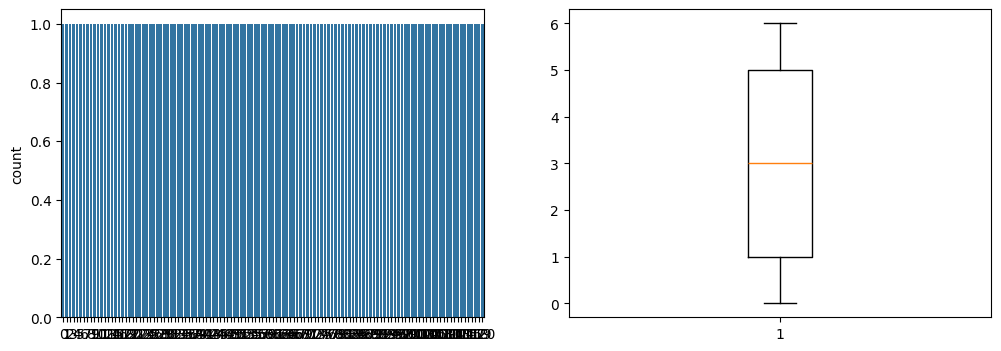

In [150]:
#melakukan Exploratory Data Hari kerja untuk dianalysis dan mengenal data lebih jauh

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Hari'])
f.add_subplot(1,2,2)
plt.boxplot(df['Hari'])
plt.show()

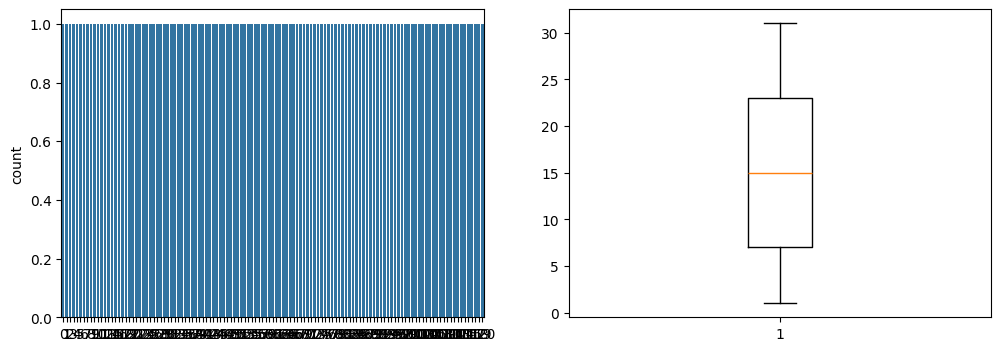

In [151]:
#melakukan Exploratory Data Tanggal untuk dianalysis dan mengenal data lebih jauh

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Tanggal'])
f.add_subplot(1,2,2)
plt.boxplot(df['Tanggal'])
plt.show()

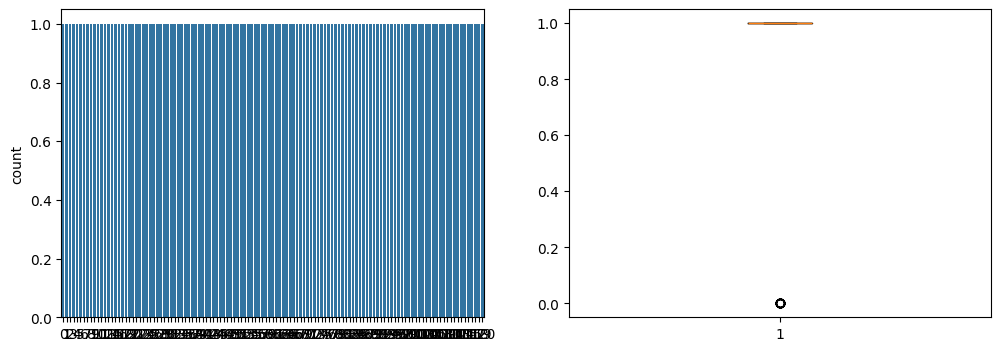

In [152]:
#melakukan Exploratory Data Kegiatan untuk dianalysis dan mengenal data lebih jauh

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Kegiatan'])
f.add_subplot(1,2,2)
plt.boxplot(df['Kegiatan'])
plt.show()

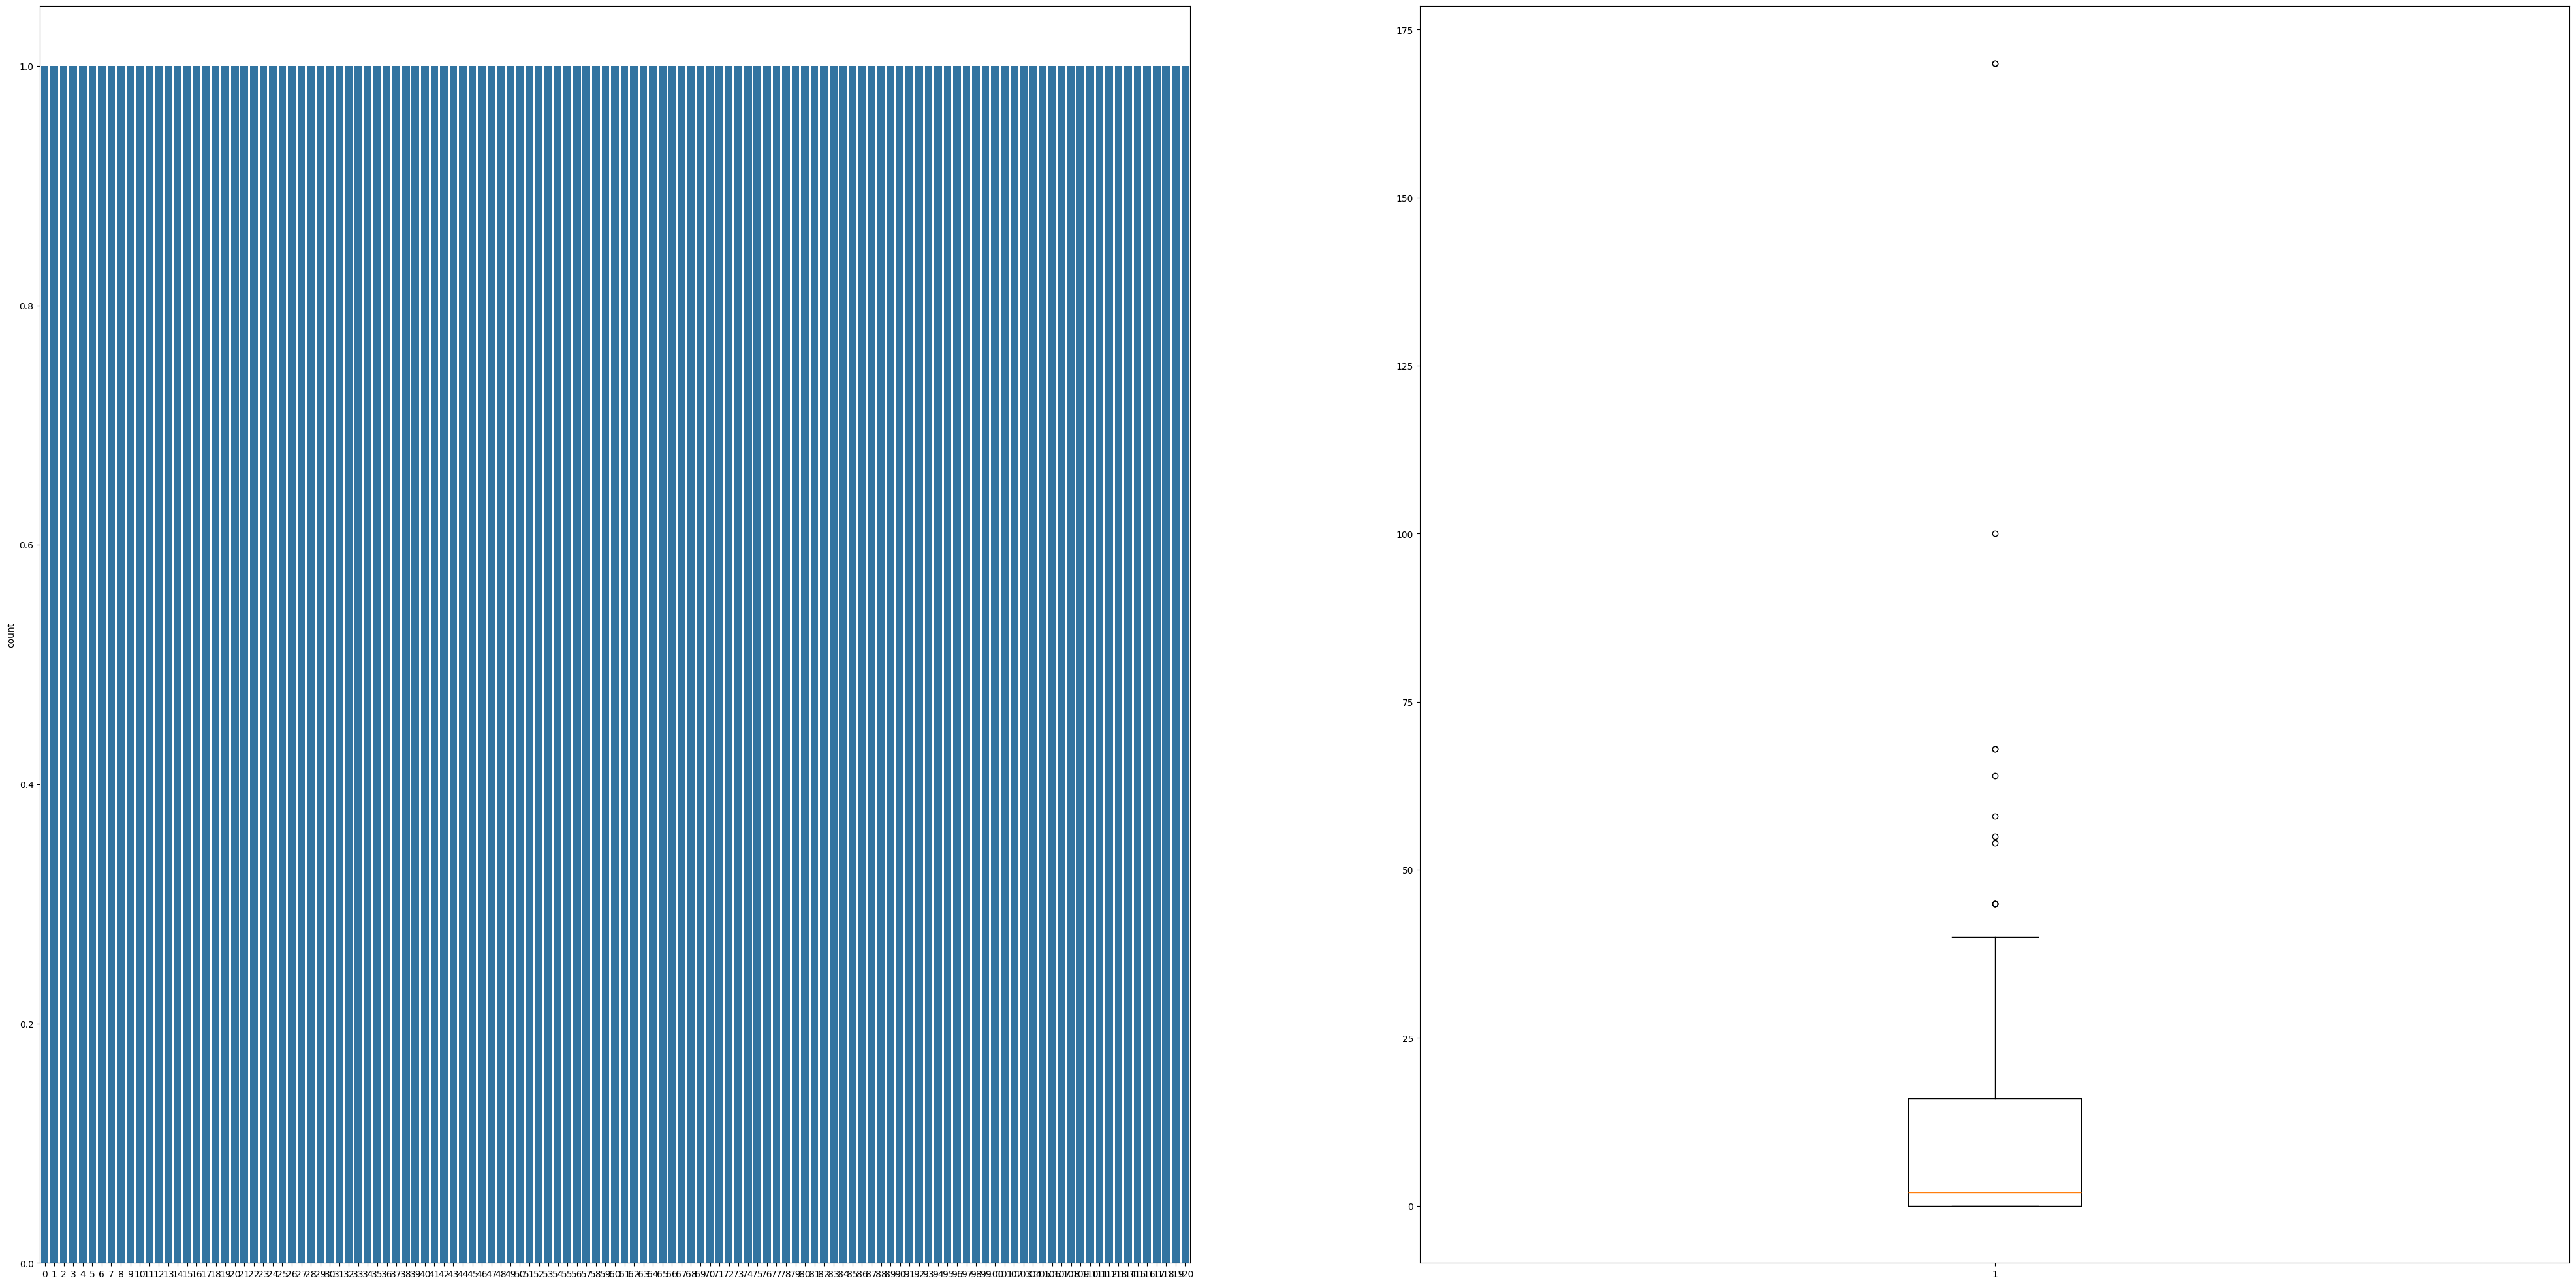

In [153]:
#melakukan Exploratory Data Curah Hujan untuk dianalysis dan mengenal data lebih jauh

f = plt.figure(figsize=(50,25))
f.add_subplot(1,2,1)
sns.countplot(df['Curah Hujan (mm)'])
f.add_subplot(1,2,2)
plt.boxplot(df['Curah Hujan (mm)'])
plt.show()

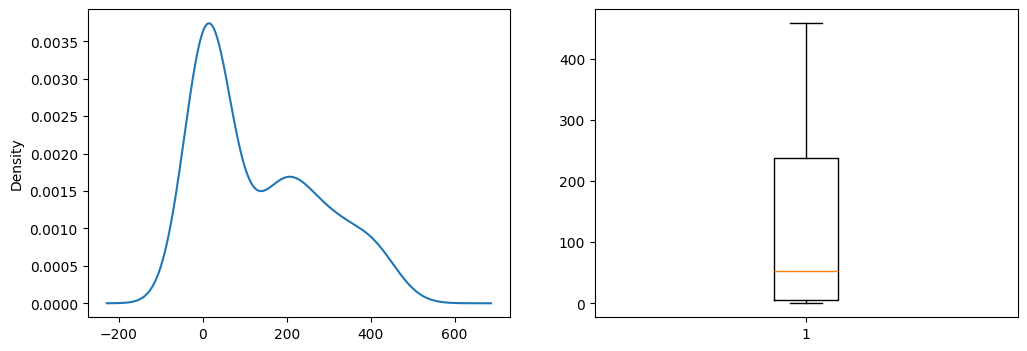

In [154]:
#melakukan Exploratory Data Penjualan untuk dianalysis dan mengenal data lebih jauh

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Penjualan (pcs)'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Penjualan (pcs)'])
plt.show()

<Figure size 1000x800 with 0 Axes>

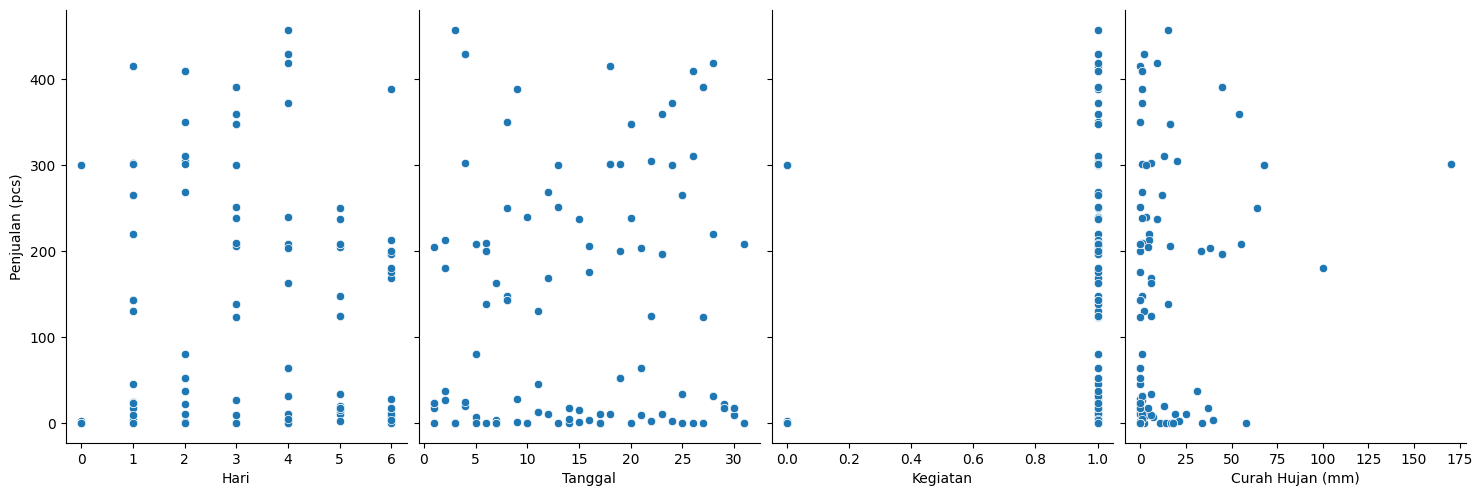

In [155]:
#menganalysis variasi antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Hari', 'Tanggal', 'Kegiatan', 'Curah Hujan (mm)'], y_vars=['Penjualan (pcs)'], height=5, aspect=0.75)

In [156]:
df_corr = df.corr().round(2)  # Membulatkan angka menjadi 2 desimal
df_corr.style.background_gradient()  # Menerapkan gradien warna

df_corr = df.corr()
df_corr.style.background_gradient().format("{:.2f}")  # Menambahkan format angka


,Hari,Tanggal,Kegiatan,Curah Hujan (mm),Penjualan (pcs)
Hari,1.00,-0.00,0.54,-0.03,0.13
Tanggal,-0.00,1.00,0.07,0.10,0.09
Kegiatan,0.54,0.07,1.00,0.01,0.35
Curah Hujan (mm),-0.03,0.10,0.01,1.00,0.26
Penjualan (pcs),0.13,0.09,0.35,0.26,1.00


In [157]:
# Pastikan x_train dan x_test berupa array
x = df.drop(columns='Penjualan (pcs)').values  # Konversi ke numpy array
y = df['Penjualan (pcs)'].values

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Latih model
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Prediksi
prediction = lin_reg.predict(np.array([[0, 1, 1, 0]]))  # Tidak akan ada peringatan
print(f"Prediksi hasil penjualan: {prediction[0]}")


Prediksi hasil penjualan: 163.3105010640781


In [158]:
#mencari tahu accuracy score dari model menggunakan testing data yang sudah displit.
lin_reg.score(x_test, y_test)

0.10404408824313394

In [159]:
#Langkah terakhir adalah melakukan prediksi terhadap hasil penjualan paling optimal
#saya mencoba membuat KPI sesuai yang saya inginkan yaitu
#penjualan di hari pertama dan di minggu pertama dan tidak ada hujan

#hari         = 0
#Tanggal      = 1
#Kegiatan     = 1
#Curah Hujan  = 0

#Prediksi hasil penjualan paling optimal.
lin_reg.predict([[0,1,1,0]])

array([163.31050106])